In [1]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.tsa.api as smt

In [2]:
#1
data = sm.datasets.co2.load_pandas()
df = data.data.sort_values('co2')
df.head()

,co2
1959-10-03,313.0
1958-11-08,313.0
1959-10-10,313.1
1958-11-15,313.2
1960-09-24,313.3


In [3]:
#2
df = df['co2'].resample('MS').mean()
df.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

### English
- Complete the code that finds the mean CO2 level monthly
### German
- Vervollständigen Sie den Code, der den durchschnittlichen CO2-Gehalt monatlich ermittelt

In [4]:
#3
df.isna().sum()

5

### English
- Find the sum of missing values
### German
- Finden Sie die Summe der fehlenden Werte

In [5]:
#4
df = df.fillna(df.bfill())

### English 
- Activate the code to fill the missing value with the value from the next year
### German 
- Aktivieren Sie den Code, um den fehlenden Wert mit dem Wert des nächsten Jahres zu füllen

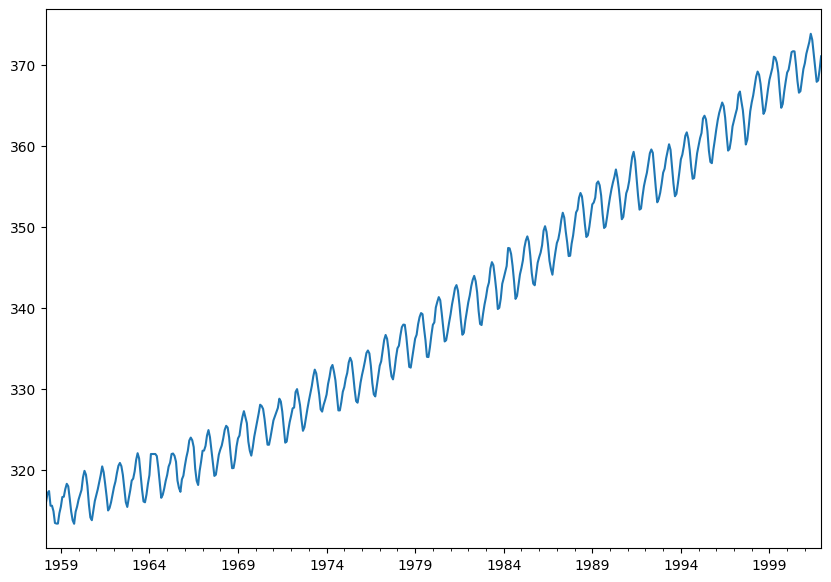

In [6]:
#5
df.plot(figsize=(10, 7))
plt.show()

### English 
-Visualize the change in CO2 levels using Plotly or any other library
### German
-Valisieren Sie die Veränderung des CO2-Gehalts mit Plotly oder einer anderen Bibliothek

## Preperation ML model 

In [7]:
#6
def check_stationarity(df):
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(df)
    test_statistic = result[0]
    p_value = result[1]
    print('ADF Statistic: %f' % test_statistic)
    print('p-value: %f' % p_value)
    if p_value < 0.05:
        print('The time series is stationary.')
    else:
        print('The time series is not stationary.')

In [8]:
check_stationarity(df)

ADF Statistic: 2.359810
p-value: 0.998990
The time series is not stationary.


### English 
- Use the check_stationarity function to check the stationarity of the dataset
### German 
- Verwenden Sie die Funktion check_stationarity, um die Stationarität des Datensatzes zu überprüfen

In [9]:
# let the train set be the part from 1958 to the end of 1997
#Lassen Sie den Trainingsdatensatz den Teil von 1958 bis Ende 1997 sein
train = df[:'1997-12-01']
print("Lenght of train", len(train))  # 478 months

# test set from the first month of 1998 to the end of 2001.
#Testdatensatz vom ersten Monat 1998 bis Ende 2001.
test = df['1998-01-01':]
print("Lenght of test", len(test))  # 48 months


Lenght of train 478
Lenght of test 48


### English 
-Activate the code to split the dataset into train and test
### German 
- Aktivieren Sie den Code, um den Datensatz in Trainings- und Testdaten zu teilen

In [10]:
#7
def transform_and_test_stationarity(series, diff_lag=1):
    time_series_log_diff = series.diff(periods=diff_lag).dropna()
    print(f"\nAfter Logarithmic Transformation and Differencing (lag={diff_lag}):")
    check_stationarity(time_series_log_diff)
    return time_series_log_diff.tail()

In [11]:
transform_and_test_stationarity(train, diff_lag=1)


After Logarithmic Transformation and Differencing (lag=1):
ADF Statistic: -4.552597
p-value: 0.000158
The time series is stationary.


1997-08-01   -1.915
1997-09-01   -2.310
1997-10-01    0.600
1997-11-01    1.630
1997-12-01    1.870
Freq: MS, Name: co2, dtype: float64

In [12]:
stationary_train = transform_and_test_stationarity(train, diff_lag=1)


After Logarithmic Transformation and Differencing (lag=1):
ADF Statistic: -4.552597
p-value: 0.000158
The time series is stationary.


### English 
- Use the transform_and_test_stationarity function to convert the train dataset to stationary. (diff_lag=1)
### German 
- Verwenden Sie die Funktion transform_and_test_stationarity, um den Trainingsdatensatz stationär zu machen (iff_lag=1)

## Model Training 

In [ ]:
# 8 
### English 
- The best parameters are below. Use them to train the model. 
### German 
- Die besten Parameter sind unten aufgeführt. Verwenden Sie sie, um das Modell zu trainieren.

- {'smoothing_level': 0.01,
 - 'smoothing_slope': 0.56,
 - 'smoothing_seasonal': 0.12,
-  'seasonal_periods': 12,
-  'damped_trend': True,
-  'Best RMSE': 0.3882619946300227}

In [ ]:
# 9
model = ExponentialSmoothing(
    train, 
    trend='add' ,
    seasonal='add', 
    seasonal_periods=12,
    damped_trend=True
)

fitted_model = model.fit(smoothing_level=0.01, smoothing_slope = 0.56, smoothing_seasonal= 0.12)
forecast_triple = fitted_model.forecast(len(test))


### English 
- Fill in the gaps in the model with the best parameters
### German 
- Füllen Sie die Lücken im Modell mit den besten Parametern aus.

In [ ]:
# 10 

test_df = test.to_frame(name='actual_values')
test_df['predicted_values_triple'] = forecast_triple
test_df.head()

### English 
- Activate the code to convert the test to a dataframe (test_df) and add the predictions to this dataframe.
### German 
- Aktivieren Sie den Code, um den Test in ein DataFrame (test_df) umzuwandeln und die Vorhersagen zu diesem DataFrame hinzuzufügen

In [19]:
mse = mean_squared_error(test_df['actual_values'], test_df['predicted_values_triple'])

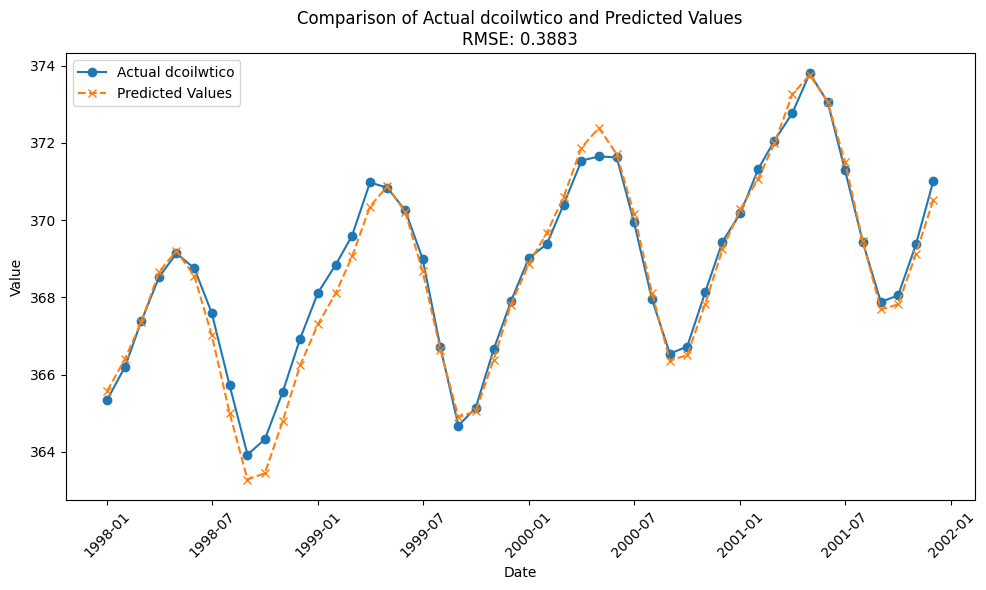

In [20]:

plt.figure(figsize=(10, 6))
plt.plot(test_df.index, test_df['actual_values'], label='Actual dcoilwtico', marker='o')
plt.plot(test_df.index, test_df['predicted_values_triple'], label='Predicted Values', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Comparison of Actual dcoilwtico and Predicted Values\nRMSE: {np.sqrt (mse):.4f}')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()